# Bitki Hastalığı Tahmini

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### eğitim seti ile

In [20]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Projelerim\\Bitki\\Datasets\\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 239 files belonging to 5 classes.


### Doğrulama Seti İle

In [21]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Projelerim\\Bitki\\Datasets\\validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 239 files belonging to 5 classes.


#### Aşım Kaybı fonksiyonunu önlemek için
1. Varsayılan olarak küçük öğrenme oranı olan 0,001'i seçin, burada 0,0001'i aldık
2. Yetersiz uyum olasılığı olabilir, bu nedenle nöron sayısını artırın
3. Resimlerden daha fazla özellik çıkarmak için daha fazla Evrişimsel Katman ekleyin, modelin ilgili özelliği yakalayamama olasılığı olabilir veya özellik eksikliği nedeniyle model kafa karıştırıcı olabilir, bu nedenle daha fazla özellik ile besleyine

In [22]:
cnn = tf.keras.models.Sequential()

### Konvolüsyon katmaı

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [29]:
cnn.add(tf.keras.layers.Flatten())

In [30]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [31]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [32]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=5,activation='softmax'))

In [33]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [35]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10




8/8 [==============================] - 23s 2s/step - loss: 3.0001 - accuracy: 0.2050 - val_loss: 1.6233 - val_accuracy: 0.2678
Epoch 2/10
8/8 [==============================] - 19s 2s/step - loss: 1.6400 - accuracy: 0.2092 - val_loss: 1.5135 - val_accuracy: 0.3682
Epoch 3/10
8/8 [==============================] - 18s 2s/step - loss: 1.5566 - accuracy: 0.2845 - val_loss: 1.4567 - val_accuracy: 0.5649
Epoch 4/10
8/8 [==============================] - 18s 2s/step - loss: 1.4894 - accuracy: 0.3640 - val_loss: 1.3554 - val_accuracy: 0.6192
Epoch 5/10
8/8 [==============================] - 18s 2s/step - loss: 1.3322 - accuracy: 0.5356 - val_loss: 1.1242 - val_accuracy: 0.6653
Epoch 6/10
8/8 [==============================] - 18s 2s/step - loss: 1.1506 - accuracy: 0.5690 - val_loss: 0.9252 - val_accuracy: 0.6192
Epoch 7/10
8/8 [==============================] - 19s 2s/step - loss: 1.0287 - accuracy: 0.6569 - val_loss: 0.9039 - val_accuracy: 0.7280
Epoch 8/10
8/8 [===========================

In [45]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

8/8 [==============================] - 4s 454ms/step - loss: 0.5620 - accuracy: 0.8033
Training accuracy: 0.8033472895622253


In [37]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

8/8 [==============================] - 4s 441ms/step - loss: 0.5620 - accuracy: 0.8033
Validation accuracy: 0.8033472895622253


### Saving Model

In [38]:
cnn.save('trained_plant_disease_model.keras')

In [39]:
training_history.history #Return Dictionary of history

{'loss': [3.0001332759857178,
  1.6399613618850708,
  1.5566034317016602,
  1.489383339881897,
  1.3322304487228394,
  1.1505663394927979,
  1.0286959409713745,
  0.9308006167411804,
  0.9869657754898071,
  0.7392324209213257],
 'accuracy': [0.20502091944217682,
  0.2092050164937973,
  0.284518837928772,
  0.36401674151420593,
  0.5355648398399353,
  0.569037675857544,
  0.6569037437438965,
  0.6652719378471375,
  0.6150627732276917,
  0.7405857443809509],
 'val_loss': [1.6232917308807373,
  1.5135424137115479,
  1.4566516876220703,
  1.3553760051727295,
  1.1242306232452393,
  0.9251726269721985,
  0.9038982391357422,
  0.850132405757904,
  0.8745887875556946,
  0.5619922280311584],
 'val_accuracy': [0.26778241991996765,
  0.3682008385658264,
  0.5648535490036011,
  0.6192468404769897,
  0.6652719378471375,
  0.6192468404769897,
  0.7280334830284119,
  0.6861924529075623,
  0.6108786463737488,
  0.8033472895622253]}

In [40]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [41]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Doğruluk Gösterimi

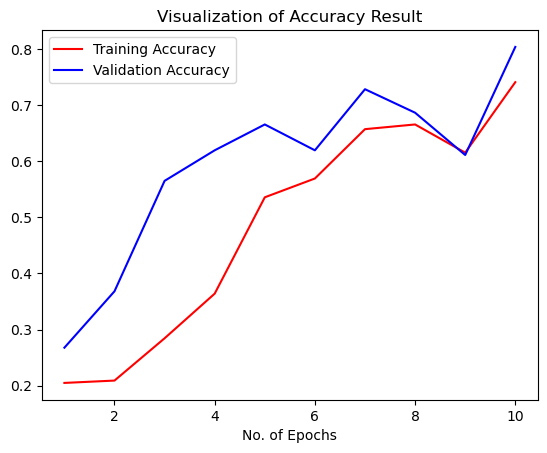

In [42]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [43]:
class_name = validation_set.class_names

In [46]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Projelerim\\Bitki\\Datasets\\validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 239 files belonging to 5 classes.


In [47]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

239/239 [==============================] - 9s 34ms/step


In [48]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [49]:
Y_true

<tf.Tensor: shape=(239,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype=int64)>

In [50]:
predicted_categories

<tf.Tensor: shape=(239,), dtype=int64, numpy=
array([0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 0, 1, 2, 3, 0, 2, 2, 2,
       0, 3, 0, 2, 2, 3, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 3, 3, 0, 0, 3,
       0, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype=int64)>

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [52]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

    Bacteria       0.71      0.88      0.79        50
       Fungi       0.94      0.68      0.79        50
   Nematodes       1.00      0.69      0.82        49
      Normal       0.56      0.80      0.66        40
       Virus       0.96      0.96      0.96        50

    accuracy                           0.80       239
   macro avg       0.84      0.80      0.80       239
weighted avg       0.85      0.80      0.81       239



### Confusion Matrix Visualization

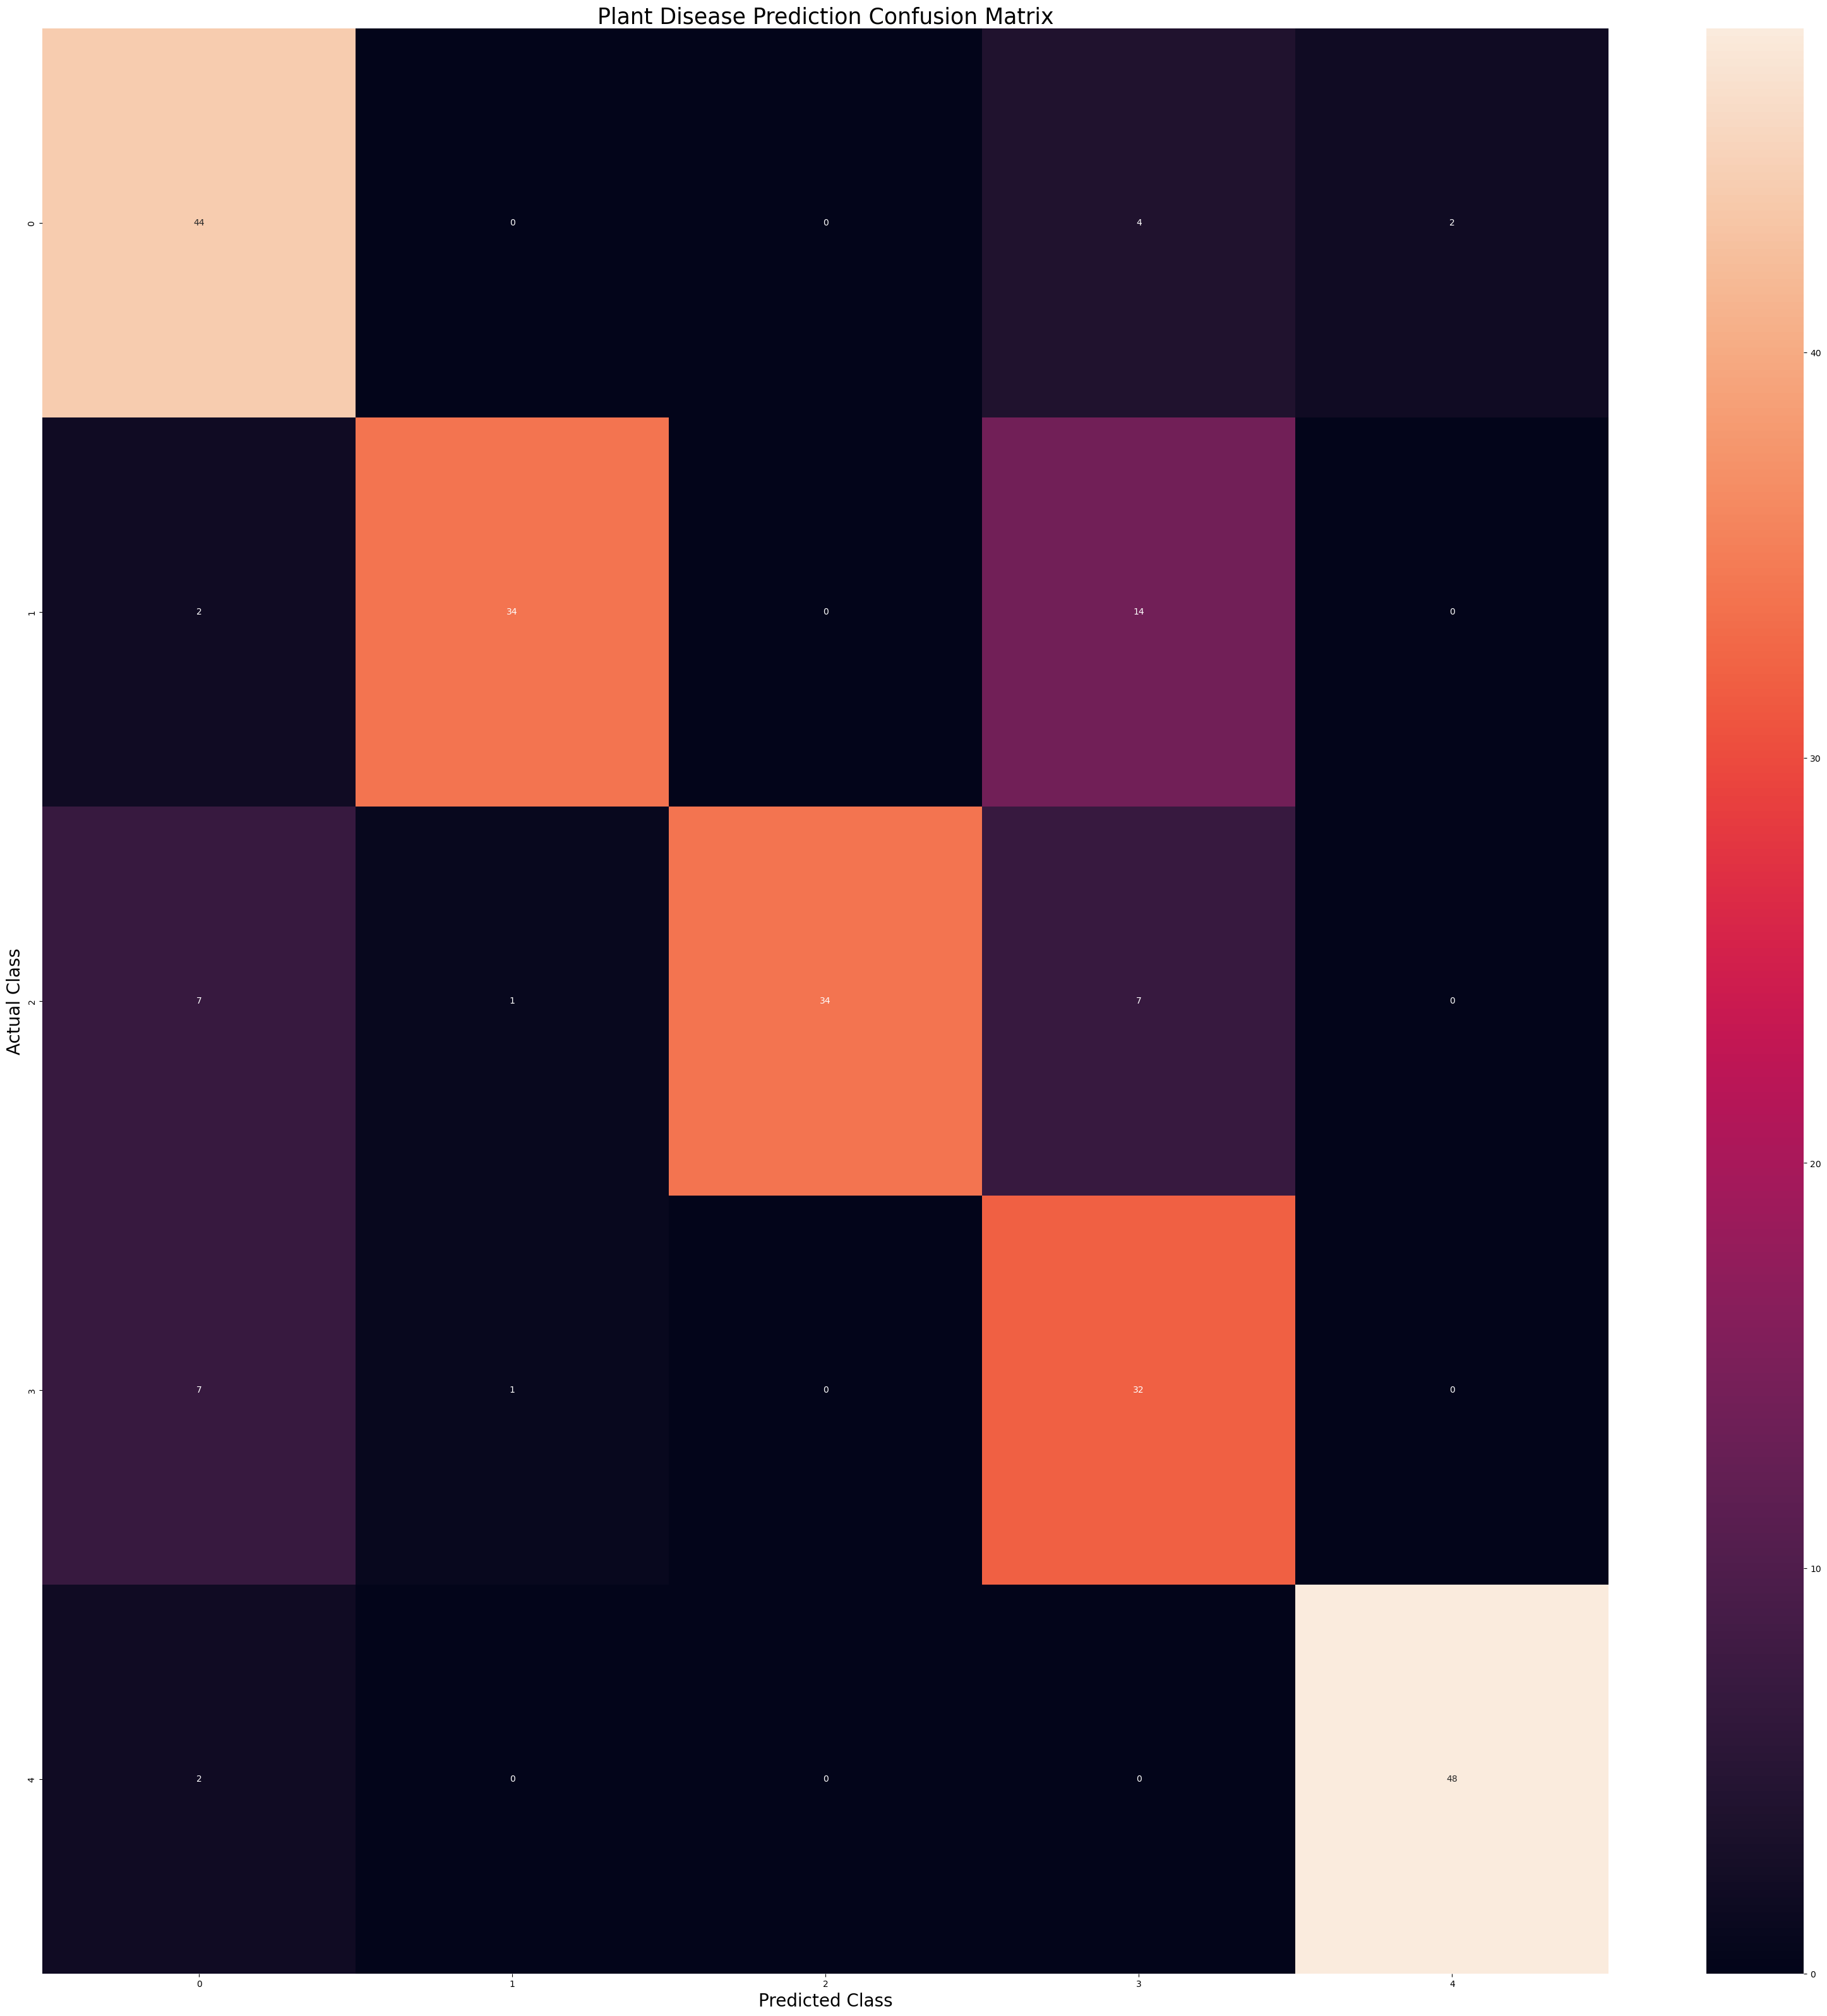

In [53]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()